# Lecture 2: Linear Regression

First we load in packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('data/country-stats.csv')
data.head()

,Country Name,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%),Urban Population (%),Life Expectancy at Birth (avg years),Fertility Rate (births per woman),Infant Mortality (deaths per 1000 births),"Enrolment Rate, Tertiary (%)","Unemployment, Total (%)",Estimated Control of Corruption (scale -2.5 to 2.5),Estimated Government Effectiveness (scale -2.5 to 2.5),Internet Users (%)
0,Afghanistan,1560.67,44.62,2.44,23.86,60.07,5.39,71.0,3.33,8.5,-1.41,-1.40,5.45
1,Albania,9403.43,115.11,0.26,54.45,77.16,1.75,15.0,54.85,14.2,-0.72,-0.28,54.66
2,Algeria,8515.35,15.86,1.89,73.71,70.75,2.83,25.6,31.46,10.0,-0.54,-0.55,15.23
3,Antigua and Barbuda,19640.35,200.35,1.03,29.87,75.50,2.12,9.2,14.37,8.4,1.29,0.48,83.79
4,Argentina,12016.20,14.88,0.88,92.64,75.84,2.20,12.7,74.83,7.2,-0.49,-0.25,55.80


## Supervised Learning

In Supervised Learning, we have:
 - Input Features x1,x2,x3,...,xn, where each is a set of values
 - Known (desired) outputs y1,y2,y3,...,yn
 - A Dataset of <xi,yi> pairs
 
The goal is the learn the mapping f:X->Y, such that yi = f(xi) for all i = 1,2,3,...,n

These problems come in two types:

 - Continuous Problems
      - Here, the desired labels are **continuous** - i.e. they can take any **value** from some range.
      - In this case, we use **Regression**.
      - Examples include predicting company stock price given company earnings and revenue, or predicting the price of a house given its size and age
 - Discrete Problems
      - Here, the desire labels are **discrete** - i.e. they take from a **discrete set**.
      - In this case, we use **Classification**.
      - Examples include predicting a digit label given an image of a handwritten digit, or predicting sentiment given a text.

## Finding a Good Model

The simplest model for f:X -> Y is y=x, which can actually work very well in some cases.

For example, if both X and Y are strongly correlated and fit inside the same range, it works well. For the dataset, this would be plotting **Estimated Corruption vs Government Effectiveness** as below.

Here we simply plot a scatter plot of the data using plt.scatter, add titles and then add a y=x line:

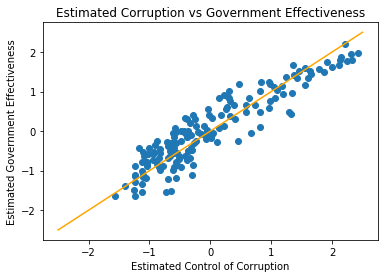

In [3]:
# Data
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Estimated Government Effectiveness (scale -2.5 to 2.5)"])

# y = x line
x_sample = np.linspace(-2.5, 2.5, 100)
y = x_sample
plt.plot(x_sample, y, color='orange')

# Add titles
plt.title('Estimated Corruption vs Government Effectiveness')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Estimated Government Effectiveness")

# Show in notebook
plt.show()

However for most practical applications this is not true, shown below.

Here we simply instead plot **Estimated Government Corruption vs Urban Population**, two features you'd expect to have no real correlation nor the same scale:

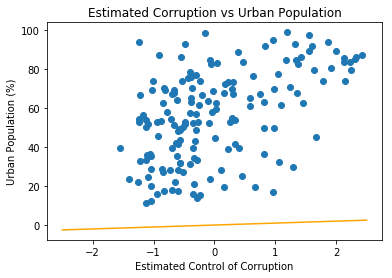

In [4]:
# Data
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])

# y = x
x_sample = np.linspace(-2.5, 2.5, 100)
y = x_sample
plt.plot(x_sample, y, color='orange')

# Titles
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")

# Show in notebook
plt.show()

We could also try a more flexible model: y = ax

Here we build a very simple Linear Regresiion model and allow it to adjust the **a** value to match the general **slope** of the data:

**Notice how we set fit_intercept=False, stopping the model for realigning predictions based on the y-intercept**

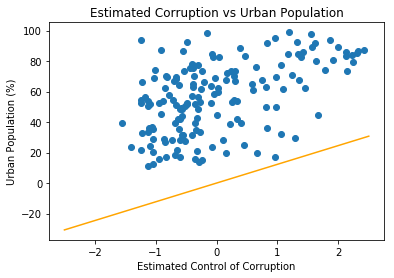

In [8]:
# Data
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])

# Now need to create a y = ax model
model = LinearRegression(fit_intercept=False)


# Set columns as 
X = data["Estimated Control of Corruption (scale -2.5 to 2.5)"].values.reshape(-1,1)
Y = data["Urban Population (%)"]
model.fit(X, Y)

x_sample = np.linspace(-2.5, 2.5, 100)
plt.plot(x_sample, model.predict(x_sample.reshape(-1,1)), color='orange')

# Finishing touches
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")
plt.show()

This graph gave us a correct looking general shape, but it's in the wrong place and would be a terrible predictor

We could instead try y = b, allowing flexibility on the **position** of the line but not the slope:

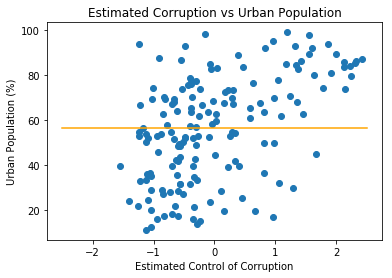

In [9]:
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")

model = LinearRegression(fit_intercept=True)
X = np.zeros((len(data["Urban Population (%)"]), 1), dtype=float)
Y = data["Urban Population (%)"]
model.fit(X, Y)

x_sample = np.linspace(-2.5, 2.5, 100)
plt.plot(x_sample, model.predict(x_sample.reshape(-1,1)), color='orange')
plt.show()

However again this would be a useless predictor. While being around the data points, it does not follow the pattern of the data.

This leads us to the simplest useful model: **y = ax + b**. This allows the line to be shaped both to the **slope** of the data and the **position** as below (done by setting fit_intercept=True):

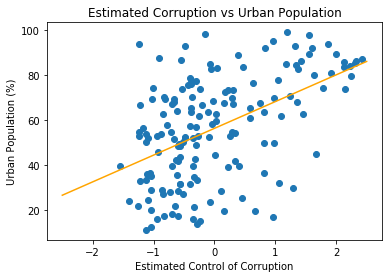

In [10]:
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")

model = LinearRegression(fit_intercept=True)
X = data["Estimated Control of Corruption (scale -2.5 to 2.5)"].values.reshape(-1,1)
Y = data["Urban Population (%)"]
model.fit(X, Y)

x_sample = np.linspace(-2.5, 2.5, 100)
plt.plot(x_sample, model.predict(x_sample.reshape(-1,1)), color='orange')
plt.show()

## Optimizing Linear Regression: Gradient Descent

Gradient Descent is about using the gradient of the data to slowly improve the RSME - The **Root Mean Square Error**

For each yi, we have a predicted value pi, which is generated with the Linear Regression model y = ax + b. Therefore for each individual error, we have a **error** of pi-yi. **By squaring this value, we get something that punishes large errors stronger, and makes small errors even less significant**

So for a set of predictions, we can define E = 1/2 * (sum of all M squared errors). This means that a smaller E means our predictions where closer to the real values.

Then the **RSME** = sqrt(E/M), which becomes a sort of "average error per prediction", but as above penalising larger errors more.

Now clearly, the RSME is something we'd want to **minimise**. Gradient Descent allows us to do this.

Gradient descent works by changing a and b in the function y = ax + b, based on the data and the RSME (the loss function). We repeatedly update parameters a and b by taking small steps in the direction of the partial derivative (change in a with respect to E and same for b).

So at each stage, a = a - alpha * delta(E)/delta(a) is applied where alpha is the learning rate / step size.
Similar for b.

The code for this is shown below, for **GDP vs Enrolment Rate** (prediciting GDP given Enrolment Rate):

In [11]:
# Define a function for plotting a Linear Regression model given features and outputs.
def plot_simple_linear_regression(X, Y, a, b, title, xlabel, ylabel):
    plt.scatter(X, Y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    x_sample = np.linspace(np.min(X), np.max(X), 100)
    plt.plot(x_sample, x_sample*a + b, color='orange')
    plt.show()

In [13]:
# Define a function applying Gradient Descent to inputs X, outputs Y, linear model coefficients a and b, and a learning rate
def gradient_descent_long(X,Y,a,b,learning_rate):
    for epoch in range(10):
        update_a = 0.0
        update_b = 0.0
        error = 0.0
        for i in range(len(Y)):
            y_predicted = a * X[i] + b
            update_a += (y_predicted - Y[i])*X[i]
            update_b += (y_predicted - Y[i])
            error += np.square(y_predicted - Y[i])
        a = a - learning_rate * update_a
        b = b - learning_rate * update_b
        rmse = np.sqrt(error / len(Y))
        print("a: {:.4f}\tb: {:.9f}\tRMSE: {:.4f}".format(a, b, rmse))
    return a,b

a: 0.0012	b: 0.000000055	RMSE: 43.6071
a: 0.0015	b: 0.000000079	RMSE: 27.7650
a: 0.0015	b: 0.000000098	RMSE: 27.1220
a: 0.0015	b: 0.000000116	RMSE: 27.1017
a: 0.0015	b: 0.000000133	RMSE: 27.1010
a: 0.0015	b: 0.000000150	RMSE: 27.1010
a: 0.0015	b: 0.000000168	RMSE: 27.1010
a: 0.0015	b: 0.000000185	RMSE: 27.1010
a: 0.0015	b: 0.000000202	RMSE: 27.1010
a: 0.0015	b: 0.000000220	RMSE: 27.1010


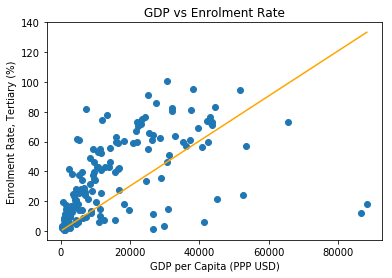

In [14]:
X = data["GDP per Capita (PPP USD)"].values
Y = data["Enrolment Rate, Tertiary (%)"].values

a = 0.0
b = 0.0
learning_rate = 1e-11
a,b = gradient_descent_long(X,Y,a,b,learning_rate)
plot_simple_linear_regression(X, Y, a, b, 
                              "GDP vs Enrolment Rate", 
                              "GDP per Capita (PPP USD)", 
                              "Enrolment Rate, Tertiary (%)")

We can also create a more compact version, taking advantage of python vector features:

In [15]:
def gradient_descent_compact(X,Y,a,b,learning_rate):
    for epoch in range(10):
        y_predicted = a * X + b
        a = a - learning_rate * ((y_predicted - Y)*X).sum()
        b = b - learning_rate * (y_predicted - Y).sum()
        rmse = np.sqrt(np.square(y_predicted - Y).mean())
        print("RMSE: " + str(rmse))